In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets#в датасетах содержится набор стандартных датасетов,
#на которых можно проверятть работу наших моделей

# Boston dataset (Регрессия)

In [2]:
boston=datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston.DESCR[100:1300])

tics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 

In [4]:
boston_df=pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


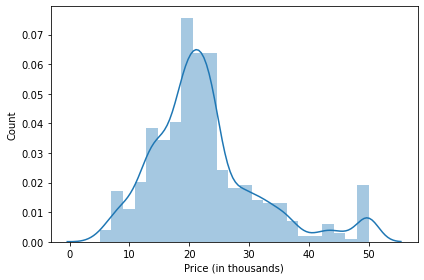

In [5]:
plt.figure(figsize=(6,4))
sns.distplot(boston.target)

plt.xlabel("Price (in thousands)")
plt.ylabel("Count")
plt.tight_layout()

In [6]:
from sklearn.linear_model import LinearRegression

linear_regression=LinearRegression()
model=linear_regression.fit(boston.data, boston.target)

In [8]:
feature_weight_df=pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
feature_weight_df.columns=["Feature", "Weight"]
print(feature_weight_df)

    Feature     Weight
0      CRIM  -0.108011
1        ZN   0.046420
2     INDUS   0.020559
3      CHAS   2.686734
4       NOX -17.766611
5        RM   3.809865
6       AGE   0.000692
7       DIS  -1.475567
8       RAD   0.306049
9       TAX  -0.012335
10  PTRATIO  -0.952747
11        B   0.009312
12    LSTAT  -0.524758


In [11]:
import operator 
first_predicted=sum(map(
        lambda pair: operator.mul(*pair),
        zip(model.coef_, boston.data[0])
))
print(first_predicted)

-6.455645008073288


In [14]:
print(model.intercept_) #Находим свободный коэффицент

36.45948838509001


In [25]:
first_predicted+=model.intercept_ #Добавляем его к нашему предсказанию
print(first_predicted)

431.05821561300695


##### Что бы не делать перемножения вручную, можно все это сделать автоматически с помощью "predict"

In [28]:
predicted=model.predict(boston.data)
print(predicted[:10])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]
